In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import skimage.exposure as skie
from skimage import data, io, filters
plt.style.use('AandA')
from skimage import util
%load_ext pycodestyle_magic

In [ ]:
!ls fits


In [3]:
def scale_image(img, img_scale=None, org_range=False):
    
    limg = np.arcsinh(img)
    # limg = img
    limg = limg / limg.max()
    if img_scale is None:
        low = np.percentile(limg, 0.25)
        high = np.percentile(limg, 99.5)
    else:
        limg_scale = np.arcsinh(img_scale)
        limg_scale = limg_scale / limg_scale.max()
        low = np.percentile(limg_scale, 0.25)
        high = np.percentile(limg_scale, 99.5)
    if org_range and img_scale is not None:
        opt_img  = skie.exposure.rescale_intensity(limg, in_range=(low,high), out_range=(min(img_scale.flatten()), max(img_scale.flatten())))
    elif org_range:
         opt_img  = skie.exposure.rescale_intensity(limg, in_range=(low,high), out_range=(min(img.flatten()),max(img.flatten())))                   
    else:
        opt_img  = skie.exposure.rescale_intensity(limg, in_range=(low,high), out_range=(0,1024))
    #opt_img  = skie.exposure.rescale_intensity(limg, in_range="image", out_range=(0,1))
    return opt_img


In [ ]:
# DARKS

In [ ]:
def darks_imgrid(chip):
    
    assert (chip <=4) and (chip >=1)
    flatdark = fits.getdata("fits/MasterDarkFlat_{chip}.fits".format(chip=chip))
    specdark = fits.getdata("fits/MasterDarkSpec_{chip}.fits".format(chip=chip))
    
    opt_flatdark = scale_image(flatdark, specdark, org_range=True)
    opt_specdark = scale_image(specdark, specdark, org_range=True)

    #inverted_flatdark = util.invert(opt_flatdark)
    #inverted_specdark = util.invert(opt_specdark)
    
    
    # Set up figure and image grid
    fig = plt.figure()
    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                     nrows_ncols=(1,2),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.15,
                     )

    # Add data to image grid
    for ax, img, title in zip(grid, [opt_flatdark, opt_specdark], ["3 seconds", "180 seconds"]):
        im = ax.imshow(img, cmap='Greys')
        ax.set_title(title)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_ylim(0, 512)
    # Colorbar
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    
    plt.savefig("fits/master_darks_{chip}_a.pdf".format(chip=chip))
    #plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
    plt.show()

darks_imgrid(1)
darks_imgrid(2)
darks_imgrid(3)
darks_imgrid(4)

# Flats

In [ ]:
def flat_imgrid(chip):
    
    assert (chip <=4) and (chip >=1)
    flat = fits.getdata("fits/Flat_{chip}.fits".format(chip=chip))
    flatr = fits.getdata("fits/FlatR_{chip}.fits".format(chip=chip))
    
   # opt_flat = scale_image(flat, flat, org_range=True)
    #opt_flatr = scale_image(flatr, flatr, org_range=True)

    #inverted_flatdark = util.invert(opt_flatdark)
    #inverted_specdark = util.invert(opt_specdark)
    
    
    # Set up figure and image grid
    fig = plt.figure()
    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                     nrows_ncols=(1,2),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.15,
                     )

    # Add data to image grid
    for ax, img, title in zip(grid, [flat, flatr], ["Flat", "Flat-R"]):
        im = ax.imshow(img, cmap='Greys')
        ax.set_title(title)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_ylim(0, 512)
    # Colorbar
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    
    plt.savefig("fits/flat_plots_{chip}_a.pdf".format(chip=chip))
    #plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
    plt.show()
    
flat_imgrid(1)
flat_imgrid(2)
flat_imgrid(3)
flat_imgrid(4)

# NODS

In [ ]:
plt.style.use('AandA')
def nod_imgrid(A, B, A_B):
    a_nod = fits.getdata(A)[:,0:150]
    b_nod = fits.getdata(B)[:,0:150]
    nod_diff = fits.getdata(A_B)[:,0:150]
   # opt_flat = scale_image(flat, flat, org_range=True)
    #opt_flatr = scale_image(flatr, flatr, org_range=True)

    #inverted_flatdark = util.invert(opt_flatdark)
    #inverted_specdark = util.invert(opt_specdark)
    
    
    # Set up figure and image grid
    fig = plt.figure()
    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                     nrows_ncols=(1,3),
                     axes_pad=0.15,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.15,
                     )

    # Add data to image grid
    for ax, img, title in zip(grid, [a_nod, b_nod, nod_diff], ["A", "B", "A-B"]):
        im = ax.imshow(img, cmap='Greys')
        ax.set_title(title)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        #ax.set_ylim(0, 512)
    # Colorbar
    ax.cax.colorbar(im)
    ax.cax.toggle_label(True)
    
    plt.savefig("nod_image_sample_a.pdf")
    #plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
    plt.show()
    
nod_imgrid(A="fits/CRIRE.2012-04-07T00:08:29.976_1.fits",
           B="fits/CRIRE.2012-04-07T00:12:08.127_1.fits",
           A_B="fits/CRIRE.2012-04-07T00:08:29.976_2.nod.fits",
           )

# /home/jneal/Phd/Writing-in-Progress/thesis/figures/reduction/fits/CRIRE.2012-04-07T00:08:29.976_1.nod.ms.fits
# /home/jneal/Phd/Writing-in-Progress/thesis/figures/reduction/fits/CRIRE.2012-04-07T00:12:08.127_1.fits
# /home/jneal/Phd/Writing-in-Progress/thesis/figures/reduction/fits/CRIRE.2012-04-07T00:12:08.127_1.nod.fits
# /home/jneal/Phd/Writing-in-Progress/thesis/figures/reduction/fits/CRIRE.2012-04-07T00:12:08.127_1.nod.ms.fits
# CRIRE.2012-04-07T00:08:29.976_1.nod.fits  

In [ ]:
plt.style.use('AandA')
def nod_slice(A, B, A_B):
    a_nod = fits.getdata(A)[:,512]
    b_nod = fits.getdata(B)[:,512]
    nod_diff = fits.getdata(A_B)[:,512]
  
    # Set up figure and image grid
    fig = plt.figure()
    
    # Add data to image grid
    for img, title, ls, col in zip([a_nod, b_nod, nod_diff], ["A", "B", "A-B"], ["-","-.","--"], ["C0", "C2", "C1"]):
        plt.plot(img, label=title, ls=ls, color=col)
    
    plt.ylabel("Pixel Intensity")
    plt.xlabel("Slit position")
    plt.ylim(-25, 100)
    plt.legend()
    plt.savefig("nod_slice_example_a.pdf")
    plt.tight_layout()    # Works, but may still require rect paramater to keep colorbar labels visible
    plt.show()
    
nod_slice(A="fits/CRIRE.2012-04-07T00:08:29.976_1.fits",
           B="fits/CRIRE.2012-04-07T00:12:08.127_1.fits",
           A_B="fits/CRIRE.2012-04-07T00:08:29.976_1.nod.fits",
           )

# /home/jneal/Phd/Writing-in-Progress/thesis/figures/reduction/fits/CRIRE.2012-04-07T00:08:29.976_1.nod.ms.fits
# /home/jneal/Phd/Writing-in-Progress/thesis/figures/reduction/fits/CRIRE.2012-04-07T00:12:08.127_1.fits
# /home/jneal/Phd/Writing-in-Progress/thesis/figures/reduction/fits/CRIRE.2012-04-07T00:12:08.127_1.nod.fits
# /home/jneal/Phd/Writing-in-Progress/thesis/figures/reduction/fits/CRIRE.2012-04-07T00:12:08.127_1.nod.ms.fits
# CRIRE.2012-04-07T00:08:29.976_1.nod.fits  

# WL CALIBRATION



In [5]:
wave_lamp = "fits/wavelamp/THAR_WAVE.fits"
def wav_master_dark(chip):
    wave_dark1 = fits.getdata("fits/wavelamp/wave_dark1.fits", chip)
    wave_dark2 = fits.getdata("fits/wavelamp/wave_dark2.fits", chip)
    wave_dark3 = fits.getdata("fits/wavelamp/wave_dark3.fits", chip)
    return (wave_dark1 + wave_dark2 + wave_dark3) / 3

In [ ]:
def lamp_imgrid(filename):
    lamps = []
    for c in [1,2,3,4]:
        lamp = fits.getdata(filename, c)
        flatr = fits.getdata("fits/FlatR_{chip}.fits".format(chip=c))
        wave_dark = wav_master_dark(chip=c)
        
        lamps.append((lamp - wave_dark))#) / flatr)
        

    org_range = True
    lamps = [scale_image(lamp,lamp, org_range=org_range) for lamp in lamps]
   
    # inverted_flatdark = util.invert(opt_flatdark)
    # inverted_specdark = util.invert(opt_specdark)

    # Set up figure and image grid
    fig = plt.figure(figsize=(7,5))
    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                     nrows_ncols=(2, 2),
                     axes_pad=0.16,
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="single",
                     cbar_size="7%",
                     cbar_pad=0.15,
                     )

    # Add data to image grid
    for ax, img, title in zip(grid,
                              lamps,
                              ["1.", "2.", "3.", "4."]):
        im = ax.imshow(img, cmap='Greys', )
        # ax.set_title(title)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.annotate(title, (-0.04,1.04), xycoords="axes fraction", fontsize=13)
        ax.set_ylim(0, 512)
    # Colorbar
    ax.cax.colorbar(im,)
    ax.cax.toggle_label(True)

    plt.savefig("fits/lamp_plots_a.pdf")
    #plt.tight_layout()    # Works, but may still require rect paramater
    # to keep colorbar labels visible
    plt.show()


lamp_imgrid(wave_lamp)

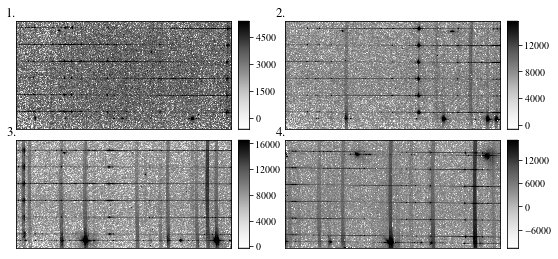

In [13]:
def lamp_imgrid(filename):
    lamps = []
    for c in [1,2,3,4]:
        lamp = fits.getdata(filename, c)
        flatr = fits.getdata("fits/FlatR_{chip}.fits".format(chip=c))
        wave_dark = wav_master_dark(chip=c)
        
        lamps.append((lamp - wave_dark))#) / flatr)
        

    org_range = True
    lamps = [scale_image(lamp,lamp, org_range=org_range) for lamp in lamps]
   
    # inverted_flatdark = util.invert(opt_flatdark)
    # inverted_specdark = util.invert(opt_specdark)

    # Set up figure and image grid
    fig = plt.figure(figsize=(9,6))
    grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                     nrows_ncols=(2, 2),
                     axes_pad=(0.5,0.16),
                     #share_all=True,
                     cbar_location="right",
                     cbar_mode="each",
                     cbar_size="5%",
                     cbar_pad=0.1,
                     )

    # Add data to image grid
    for ax, img, title in zip(grid,
                              lamps,
                              ["1.", "2.", "3.", "4."]):
        im = ax.imshow(img, cmap='Greys', )
        # ax.set_title(title)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.annotate(title, (-0.04,1.04), xycoords="axes fraction", fontsize=13)
        ax.set_ylim(0, 512)
        # Colorbar
    
    #ax = grid[0]
        ax.cax.colorbar(im,)
        ax.cax.toggle_label(True)

    plt.savefig("fits/lamp_plots_cbar_each.pdf")
    #plt.tight_layout()    # Works, but may still require rect paramater
    # to keep colorbar labels visible
    plt.show()


lamp_imgrid(wave_lamp)

In [10]:
ImageGrid?

# ESO extracted

In [ ]:
eso = fits.getdata("fits/crires_spec_eso_extracted.fits")

In [ ]:
eso.columns

In [ ]:
plt.plot(eso["Extracted_RECT"], label="eso pipeline")
plt.plot(eso["Extracted_OPT"], label="eso optimal pipeline")

plt.legend()